### Part 1
#### Classification: 

### Part 2
#### Clustering:

//

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
data = pd.read_csv("/workspaces/IT326/Dataset/Processed_dataset.csv", encoding="windows-1252")  
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               53943 non-null  int64  
 1   Month              53943 non-null  int64  
 2   Day                53943 non-null  int64  
 3   Weekend?           53943 non-null  int64  
 4   Hour               53943 non-null  float64
 5   Collision Type     53943 non-null  int64  
 6   Injury Type        53943 non-null  int64  
 7   Primary Factor     53943 non-null  int64  
 8   Reported_Location  53943 non-null  int64  
 9   Latitude           53943 non-null  float64
 10  Longitude          53943 non-null  float64
 11  Risk Level         53943 non-null  object 
 12  Hour_Bin           53943 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 5.4+ MB
None


### Step 1: Feature Scaling
To prepare for clustering, we removed the target variable, 'Risk Level,' and standardized the remaining features. Standard scaling was applied to ensure that each feature contributes equally to the clustering algorithm.

Below is the head of the scaled dataset:

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Remove class label for clustering
features = data.drop(columns=['Risk Level'])

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame with the scaled features
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)

# Display the first few rows to confirm scaling
print("\nScaled DataFrame:")
print(scaled_data.head())



Scaled DataFrame:
       Year     Month       Day  Weekend?      Hour  Collision Type  \
0  1.591657 -1.611041  0.420592 -0.571221 -2.539427       -0.058135   
1  1.591657 -1.611041  0.944311 -0.571221  0.287886       -0.058135   
2  1.591657 -1.611041  0.944311  1.750636  1.795786       -0.058135   
3  1.591657 -1.611041  1.468030  1.750636 -0.843039       -0.058135   
4  1.591657 -1.611041  1.468030  1.750636 -0.466064       -0.058135   

   Injury Type  Primary Factor  Reported_Location  Latitude  Longitude  \
0    -0.404883        0.330961          -1.339926  0.316932  -0.316895   
1    -0.404883       -0.698938          -1.287891  0.317130  -0.317254   
2     1.819890       -1.085150          -0.815059  0.316097  -0.318619   
3     1.819890       -0.763306           0.200040  0.317503  -0.318902   
4    -0.404883       -0.763306           1.585908  0.317432  -0.319049   

   Hour_Bin  
0  2.045609  
1 -0.933502  
2  0.059535  
3  1.052572  
4  1.052572  


In [8]:
%pip install Kneed


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

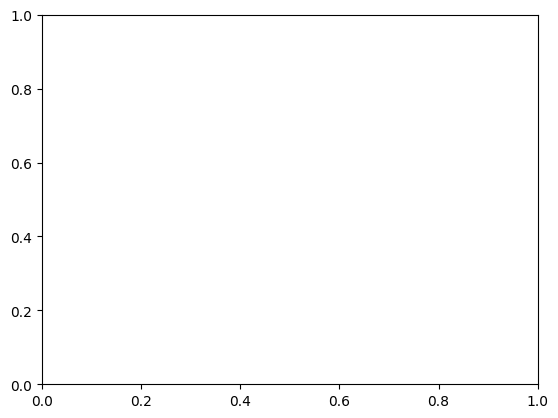

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from kneed import KneeLocator

wss_values=[]
k_values= range(1,11)

for k in k_values:
    KMeans=make_pipeline (StandardScaler(), KMeans(n_clusters=k))
    KMeans.fit(scaled_data)
    wss_values.append(KMeans.named_steps['kmeans'].inertia_)



    plt.plot(k_values, wss_values, marker='o')
    plt.xlabel('NUmber of clusters (k)')
    plt.ylabel('Within-cluster sum of square (WSS)')
    plt.title('Elbow Method')
    plt.legend()
    plt.show()